Importing the Dependencies

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
# loading the dataset to a Pandas DataFrame
credit_card = pd.read_csv('/content/creditcard.csv')

In [3]:
credit_card.head()          # first 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
credit_card.tail()           # last 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142681,84874,-1.175585,-0.435225,1.228103,0.052441,1.503111,-2.004394,-0.122498,-0.046657,-0.325656,...,-0.066904,-0.643857,0.314354,0.337604,-0.403670,-0.122969,-0.016914,0.101735,1.98,0.0
142682,84874,1.241407,-0.414978,-0.880402,-1.049339,1.638588,3.350938,-0.809687,0.865613,0.244406,...,-0.223144,-0.895358,0.084569,1.038418,0.155673,0.799608,-0.067291,0.014978,44.62,0.0
142683,84875,-1.329905,0.864110,0.177223,-0.902612,1.291457,4.002512,-1.207749,1.972494,-0.153283,...,0.038467,-0.217288,-0.119543,1.036008,0.056579,0.301629,-0.283690,-0.036675,11.50,0.0
142684,84876,-0.636351,1.257445,1.521837,-0.027459,0.006568,-1.158053,1.058088,-0.476554,0.360277,...,-0.417344,-0.675847,-0.031819,0.635950,-0.178399,0.006644,0.133808,-0.227752,7.96,0.0
142685,84876,0.961973,-0.860360,-0.430272,-1.837038,-0.580153,-0.900000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# dataset informations
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142686 entries, 0 to 142685
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    142686 non-null  int64  
 1   V1      142686 non-null  float64
 2   V2      142686 non-null  float64
 3   V3      142686 non-null  float64
 4   V4      142686 non-null  float64
 5   V5      142686 non-null  float64
 6   V6      142686 non-null  float64
 7   V7      142685 non-null  float64
 8   V8      142685 non-null  float64
 9   V9      142685 non-null  float64
 10  V10     142685 non-null  float64
 11  V11     142685 non-null  float64
 12  V12     142685 non-null  float64
 13  V13     142685 non-null  float64
 14  V14     142685 non-null  float64
 15  V15     142685 non-null  float64
 16  V16     142685 non-null  float64
 17  V17     142685 non-null  float64
 18  V18     142685 non-null  float64
 19  V19     142685 non-null  float64
 20  V20     142685 non-null  float64
 21  V21     14

In [6]:
# checking the number of missing values in each column
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
# distribution of legit transactions & fraudulent transactions
credit_card['Class'].value_counts()

0.0    142414
1.0       271
Name: Class, dtype: int64

This Dataset is highly unblanced




0 --> Normal Transaction

1 --> fraudulent transaction


In [9]:
# separating the data for analysis
legit = credit_card[credit_card.Class == 0]
fraud = credit_card[credit_card.Class == 1]

In [10]:
print(legit.shape)
print(fraud.shape)

(142414, 31)
(271, 31)


In [11]:
# statistical measures of the data
legit.Amount.describe()

count    142414.000000
mean         90.605582
std         246.362078
min           0.000000
25%           5.990000
50%          23.545000
75%          80.000000
max       19656.530000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     271.000000
mean      117.543579
std       245.192472
min         0.000000
25%         1.000000
50%         9.990000
75%       100.745000
max      1809.680000
Name: Amount, dtype: float64

In [13]:
# compare the values for both transactions
credit_card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,52483.978661,-0.239861,0.014111,0.688369,0.128882,-0.275950,0.081053,-0.107123,0.062368,-0.084300,...,0.041924,-0.042274,-0.117665,-0.033033,0.011573,0.130669,0.021440,-0.000325,0.002035,90.605582
1.0,43502.468635,-5.511878,3.894277,-7.088329,4.502723,-3.930204,-1.484990,-5.898183,1.503003,-2.625883,...,0.265625,1.251063,-0.314579,-0.117331,-0.113649,0.210638,0.071343,0.505482,0.092758,117.543579


In [35]:
corr=credit_card.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.000015,0.006956,-0.025101,-0.036526,-0.026831,-0.020027,-0.005586,0.018049,-0.189517,...,-0.012498,-0.009934,0.009676,0.002744,-0.000536,-0.013946,-0.009624,-0.002432,-0.009835,-0.018505
V1,-0.000015,1.000000,0.001088,0.200844,-0.048214,0.009713,0.050408,0.079964,-0.012901,-0.056391,...,-0.016727,-0.058041,-0.085237,-0.015888,0.207561,0.010854,-0.000469,0.155153,-0.237041,-0.126511
V2,0.006956,0.001088,1.000000,-0.094939,0.038624,-0.035730,0.014007,-0.018922,0.005353,0.004548,...,-0.028590,-0.019085,0.030938,-0.018536,-0.091380,-0.029936,-0.003560,0.021279,-0.546681,0.104908
V3,-0.025101,0.200844,-0.094939,1.000000,-0.064304,0.165993,-0.082734,0.183776,-0.105204,0.096999,...,0.042927,0.245218,0.032798,0.027817,-0.195859,0.032204,-0.046896,0.028556,-0.225521,-0.267413
V4,-0.036526,-0.048214,0.038624,-0.064304,1.000000,0.010099,-0.038096,-0.000470,0.027227,0.038536,...,0.026135,0.037939,-0.008682,-0.001618,-0.005669,-0.024401,0.031728,-0.002715,0.094362,0.144029
V5,-0.026831,0.009713,-0.035730,0.165993,0.010099,1.000000,0.060994,-0.027138,-0.015199,0.019961,...,-0.042710,-0.093708,0.008478,-0.018645,-0.015558,-0.043181,-0.009707,-0.009868,-0.393560,-0.121927
V6,-0.020027,0.050408,0.014007,-0.082734,-0.038096,0.060994,1.000000,0.021754,-0.046268,0.036966,...,0.006037,0.050678,-0.017329,-0.007029,0.046982,0.011108,-0.014835,-0.004662,0.201680,-0.053173
V7,-0.005586,0.079964,-0.018922,0.183776,-0.000470,-0.027138,0.021754,1.000000,0.033754,0.036574,...,0.021156,-0.058635,0.054514,0.000786,-0.099648,-0.026565,-0.081837,-0.045818,0.372495,-0.216378
V8,0.018049,-0.012901,0.005353,-0.105204,0.027227,-0.015199,-0.046268,0.033754,1.000000,0.000249,...,0.063860,0.016858,-0.026879,0.010910,0.015270,0.010808,0.011935,0.014138,-0.088524,0.050858
V9,-0.189517,-0.056391,0.004548,0.096999,0.038536,0.019961,0.036966,0.036574,0.000249,1.000000,...,0.014468,0.052806,-0.051381,0.013986,0.135883,0.088968,-0.017457,-0.035715,-0.022987,-0.101489


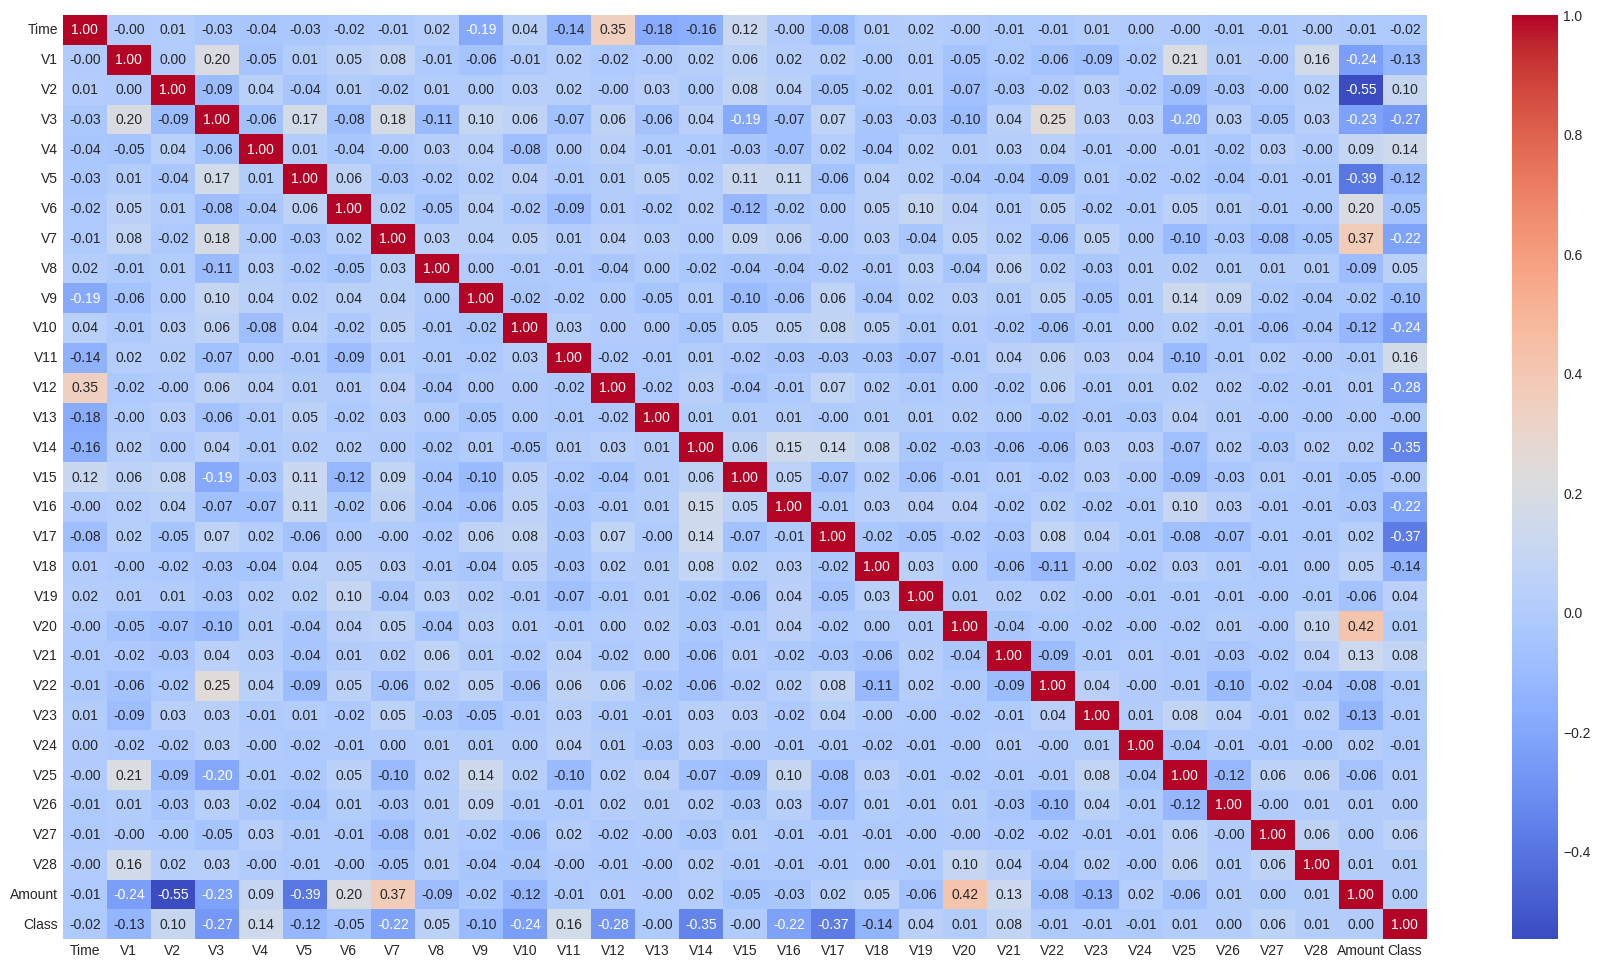

In [44]:
plt.figure(figsize=(22,12))
sns.heatmap(credit_card.corr(), annot=True,fmt=".2f",cmap='coolwarm')
plt.show()

**Under-Sampling**

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [14]:
legit_sample = legit.sample(n=492)

In [16]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [45]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29078,35308,-0.730802,0.196160,2.094506,0.008869,-0.050322,-0.149483,-0.045674,0.248581,-0.679244,...,0.039241,-0.057470,0.151300,0.264942,-0.629366,0.908219,0.038675,0.108504,34.03,0.0
8689,11779,-1.322735,-0.527584,1.613915,-1.690692,-1.791939,1.119810,2.844867,-0.884837,2.556572,...,-0.122660,0.540556,-0.044576,-0.447218,0.835269,-0.664120,-0.148783,-0.496638,567.00,0.0
4266,3755,1.372955,-0.730758,-0.931581,-1.604395,1.443775,3.280036,-1.150876,0.706540,0.358377,...,-0.269204,-0.906016,0.068290,0.920775,0.351633,-0.509949,-0.022707,0.018000,56.66,0.0
37593,39025,1.130873,0.319245,0.611621,1.324257,-0.374902,-0.701881,0.115508,-0.128417,-0.131993,...,0.145960,0.501961,-0.030663,0.624721,0.542511,-0.286703,0.036612,0.027115,16.00,0.0
136361,81667,1.210132,-0.047408,0.386577,0.602967,-0.696339,-0.972196,-0.095934,-0.135133,0.374946,...,0.134433,0.330826,-0.128967,0.430472,0.487359,0.623632,-0.050740,0.012218,31.80,0.0


In [46]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
141258,84204,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1.0
141259,84204,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1.0
141260,84204,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1.0
142405,84694,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,...,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,12.31,1.0
142557,84789,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1.0


In [19]:
new_dataset['Class'].value_counts()

0.0    492
1.0    271
Name: Class, dtype: int64

In [20]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,54585.861789,-0.169945,0.063538,0.763748,0.202848,-0.299513,0.038415,-0.042567,0.105435,-0.160065,...,0.023557,-0.021341,-0.063897,-0.048944,0.043058,0.096533,0.047928,0.008697,-0.003872,89.513374
1.0,43502.468635,-5.511878,3.894277,-7.088329,4.502723,-3.930204,-1.484990,-5.898183,1.503003,-2.625883,...,0.265625,1.251063,-0.314579,-0.117331,-0.113649,0.210638,0.071343,0.505482,0.092758,117.543579


In [49]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29078,35308,-0.730802,0.196160,2.094506,0.008869,-0.050322,-0.149483,-0.045674,0.248581,-0.679244,...,0.039241,-0.057470,0.151300,0.264942,-0.629366,0.908219,0.038675,0.108504,34.03,0.0
8689,11779,-1.322735,-0.527584,1.613915,-1.690692,-1.791939,1.119810,2.844867,-0.884837,2.556572,...,-0.122660,0.540556,-0.044576,-0.447218,0.835269,-0.664120,-0.148783,-0.496638,567.00,0.0
4266,3755,1.372955,-0.730758,-0.931581,-1.604395,1.443775,3.280036,-1.150876,0.706540,0.358377,...,-0.269204,-0.906016,0.068290,0.920775,0.351633,-0.509949,-0.022707,0.018000,56.66,0.0
37593,39025,1.130873,0.319245,0.611621,1.324257,-0.374902,-0.701881,0.115508,-0.128417,-0.131993,...,0.145960,0.501961,-0.030663,0.624721,0.542511,-0.286703,0.036612,0.027115,16.00,0.0
136361,81667,1.210132,-0.047408,0.386577,0.602967,-0.696339,-0.972196,-0.095934,-0.135133,0.374946,...,0.134433,0.330826,-0.128967,0.430472,0.487359,0.623632,-0.050740,0.012218,31.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141258,84204,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1.0
141259,84204,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1.0
141260,84204,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1.0
142405,84694,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,...,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,12.31,1.0


Splitting the data into Features & Targets

In [21]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [22]:
print(X)

         Time        V1        V2        V3        V4        V5        V6  \
29078   35308 -0.730802  0.196160  2.094506  0.008869 -0.050322 -0.149483   
8689    11779 -1.322735 -0.527584  1.613915 -1.690692 -1.791939  1.119810   
4266     3755  1.372955 -0.730758 -0.931581 -1.604395  1.443775  3.280036   
37593   39025  1.130873  0.319245  0.611621  1.324257 -0.374902 -0.701881   
136361  81667  1.210132 -0.047408  0.386577  0.602967 -0.696339 -0.972196   
...       ...       ...       ...       ...       ...       ...       ...   
141258  84204 -0.937843  3.462889 -6.445104  4.932199 -2.233983 -2.291561   
141259  84204 -1.927453  1.827621 -7.019495  5.348303 -2.739188 -2.107219   
141260  84204 -1.927453  1.827621 -7.019495  5.348303 -2.739188 -2.107219   
142405  84694 -4.868108  1.264420 -5.167885  3.193648 -3.045621 -2.096166   
142557  84789 -1.430864 -0.802529  1.123320  0.389760 -0.281214 -0.055123   

              V7        V8        V9  ...       V20       V21       V22  \


In [23]:
print(Y)

29078     0.0
8689      0.0
4266      0.0
37593     0.0
136361    0.0
         ... 
141258    1.0
141259    1.0
141260    1.0
142405    1.0
142557    1.0
Name: Class, Length: 763, dtype: float64


Split the data into Training data & Testing Data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(763, 30) (610, 30) (153, 30)


**Model Training**

Logistic Regression



In [26]:
model = LogisticRegression()

In [27]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

**Model Evaluation**

Accuracy Score

In [28]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9491803278688524


In [30]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9477124183006536
